In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Collect Data

collect data train and test from : https://www.kaggle.com/competitions/playground-series-s3e24/overview

In [2]:
data_train = pd.read_csv('playground-series-s3e24/train.csv')
data_test = pd.read_csv('playground-series-s3e24/test.csv')

In [3]:
pd.set_option('display.max_columns', None)
data_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
data_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
# Check the duplicate
data_train.duplicated().sum()

0

In [7]:
# check for missing values
data_train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

There's 24 columns with 23 column as feature and 1 column as target (smoking) <br>
None of the feature is null value

In [11]:
# show all columns
pd.set_option('display.max_columns', None)
# see data describe transpose full
data_train.describe(include='all')
# data_train.describe(include='all').

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
# check value untill 90 percentile in describe
data_train.describe(percentiles=[.25,.5,.75,.9]).style.background_gradient(cmap='Blues')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
90%,143329.500000,60.000000,175.000000,85.000000,94.200000,1.500000,1.500000,1.000000,1.000000,139.000000,88.000000,114.000000,231.000000,216.000000,76.000000,148.000000,16.500000,1.000000,1.100000,36.000000,46.000000,66.000000,1.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [15]:
# check value percentile by smoking status
smoking_stats = data_train.groupby('smoking').describe(percentiles=[.25, .5, .75, .9])
smoking_stats.stack().unstack(0)

id                          age                \
smoking              0              1             0             1   
count     89603.000000   69653.000000  89603.000000  69653.000000   
mean      79653.099126   79594.568777     46.457819     41.539288   
std       45969.273787   45978.997270     12.166010     10.799636   
min           1.000000       0.000000     20.000000     20.000000   
25%       39716.000000   39942.000000     40.000000     35.000000   
50%       79733.000000   79521.000000     45.000000     40.000000   
75%      119397.500000  119512.000000     55.000000     50.000000   
90%      143359.800000  143284.800000     60.000000     60.000000   
max      159255.000000  159254.000000     85.000000     85.000000   

           height(cm)                  weight(kg)                   waist(cm)  \
smoking             0             1             0             1             0   
count    89603.000000  69653.000000  89603.000000  69653.000000  89603.000000   
mean       161.790442    169.739150     63.240349     72.164961     80.927077   
std          9.010311      6.151247     12.170514     11.262302      9.084383   
min        135.000000    135.000000     30.000000     30.000000     56.000000   
25%        155.000000    165.000000     55.000000     65.000000     74.000000   
50%        160.000000    170.000000     60.000000     70.000000     81.000000   
75%        170.000000    175.000000     70.000000     80.000000     87.000000   
90%        175.000000    175.000000     80.000000     85.000000     93.000000   
max        190.000000    190.000000    130.000000    130.000000    127.000000   

                      eyesight(left)               eyesight(right)  \
smoking             1              0             1               0   
count    69653.000000   89603.000000  69653.000000    89603.000000   
mean        85.671199       0.970196      1.051597        0.963018   
std          8.040383       0.419043      0.374278        0.411297   
min         51.000000       0.100000      0.100000        0.100000   
25%         80.000000       0.800000      0.900000        0.800000   
50%         85.900000       1.000000      1.000000        1.000000   
75%         91.000000       1.200000      1.200000        1.200000   
90%         96.000000       1.500000      1.500000        1.500000   
max        127.000000       9.900000      9.900000        9.900000   

                      hearing(left)               hearing(right)  \
smoking             1             0             1              0   
count    69653.000000  89603.000000  69653.000000   89603.000000   
mean         1.049836      1.029128      1.017343       1.028336   
std          0.360582      0.168168      0.130547       0.165932   
min          0.100000      1.000000      1.000000       1.000000   
25%          0.900000      1.000000      1.000000       1.000000   
50%          1.000000      1.000000      1.000000       1.000000   
75%          1.200000      1.000000      1.000000       1.000000   
90%          1.500000      1.000000      1.000000       1.000000   
max          9.900000      2.000000      2.000000       2.000000   

                           systolic                  relaxation                \
smoking             1             0             1             0             1   
count    69653.000000  89603.000000  69653.000000  89603.000000  69653.000000   
mean         1.017099    121.845507    123.350294     76.005692     77.991171   
std          0.129641     13.379236     11.787073      9.236044      8.545482   
min          1.000000     77.000000     80.000000     44.000000     46.000000   
25%          1.000000    112.000000    116.000000     70.000000     71.000000   
50%          1.000000    120.000000    122.000000     76.000000     79.000000   
75%          1.000000    130.000000    130.000000     81.000000     83.000000   
90%          1.000000    139.000000    138.000000     88.000000     88.000000   
max          2.000000    213.000000   

As we see, some of data have few unique value, so we can assume that the data is categorical data

In [11]:
print(f'hearing(left) : \n{data_train["hearing(left)"].value_counts()}')
print(f'\nhearing(right) : \n{data_train["hearing(right)"].value_counts()}')
print(f'\nUrine protein : \n{data_train["Urine protein"].value_counts()}')
print(f'\ndental caries : \n{data_train["dental caries"].value_counts()}')
print(f'\nAge : \n{data_train["age"].value_counts()}')
print(f'\nsmoking : \n{data_train["smoking"].value_counts()}')


hearing(left) : 
1    155438
2      3818
Name: hearing(left), dtype: int64

hearing(right) : 
1    155526
2      3730
Name: hearing(right), dtype: int64

Urine protein : 
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: Urine protein, dtype: int64

dental caries : 
0    127724
1     31532
Name: dental caries, dtype: int64

Age : 
40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: age, dtype: int64

smoking : 
0    89603
1    69653
Name: smoking, dtype: int64


From the result above, there's data with categorical <br>
The columns with categorical data such as: <br>
- hearing(left)<br>
- hearing(right)<br>
- Urine Protein<br>
- dental caries<br>
- smoking<br>

# Visualize Data

In [12]:
# Change data into categorical data for visualize need
data_visualize = data_train.copy()
data_visualize['hearing(left)'] = data_visualize['hearing(left)'].astype('category')
data_visualize['hearing(right)'] = data_visualize['hearing(right)'].astype('category')
data_visualize['Urine protein'] = data_visualize['Urine protein'].astype('category')
data_visualize['dental caries'] = data_visualize['dental caries'].astype('category')
data_visualize['smoking'] = data_visualize['smoking'].astype('category')
data_visualize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   159256 non-null  int64   
 1   age                  159256 non-null  int64   
 2   height(cm)           159256 non-null  int64   
 3   weight(kg)           159256 non-null  int64   
 4   waist(cm)            159256 non-null  float64 
 5   eyesight(left)       159256 non-null  float64 
 6   eyesight(right)      159256 non-null  float64 
 7   hearing(left)        159256 non-null  category
 8   hearing(right)       159256 non-null  category
 9   systolic             159256 non-null  int64   
 10  relaxation           159256 non-null  int64   
 11  fasting blood sugar  159256 non-null  int64   
 12  Cholesterol          159256 non-null  int64   
 13  triglyceride         159256 non-null  int64   
 14  HDL                  159256 non-null  int64   
 15  

0    89603
1    69653
Name: smoking, dtype: int64


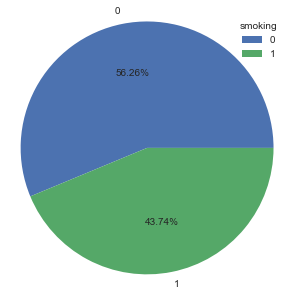

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
print(data_train['smoking'].value_counts())
fig, ax=plt.subplots(1,1,figsize=(5,5))
# using pie chart to show the distribution of smoking
def plot_pie(column):
    # for plotting
    ax.pie(column.value_counts(),autopct='%1.2f%%',labels=column.value_counts().index)
    ax.legend(column.value_counts().index).set_title(column.name)
    ax.axis('equal')

plot_pie(data_train['smoking'])

as we can see here, the distribution of the data is still acceptable. <br>
the difference between the target is 19,950 or equal 12.6% of whole data.

## Let's see the data separately by the Visible Characteristics

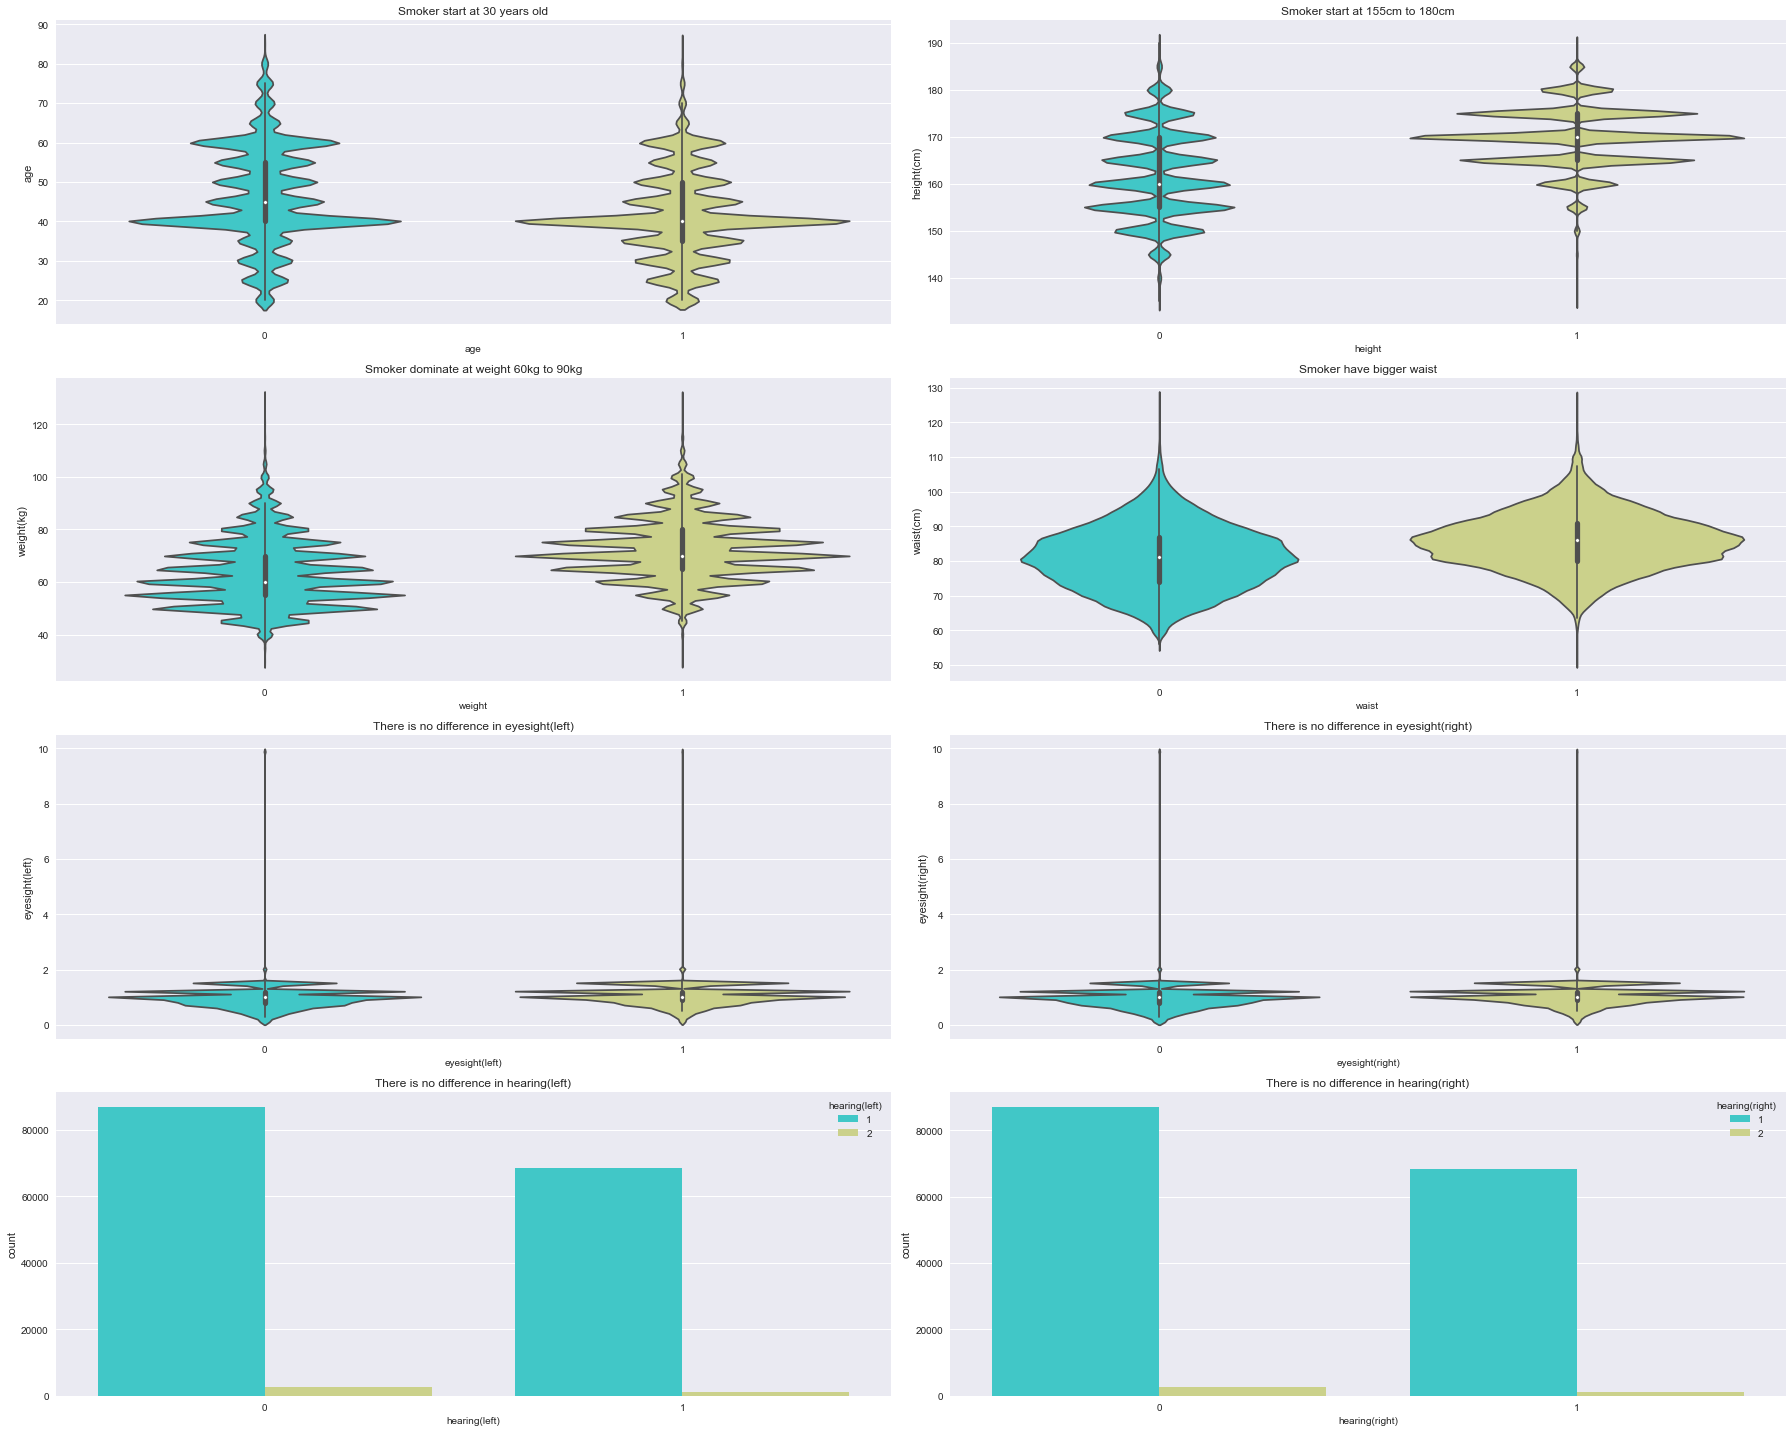

In [16]:
# check the distribution of the target variable
fig, ax=plt.subplots(4,2,figsize=(25,20))
plt.style.use("seaborn")

sns.violinplot(data=data_visualize,x='smoking',y='age',ax=ax[0,0],
               palette='rainbow')
ax[0,0].set_xlabel("age",fontsize=10)
ax[0,0].title.set_text("Smoker start at 30 years old")

sns.violinplot(x='smoking',y='height(cm)',data=data_visualize,ax=ax[0,1],
               palette='rainbow')
ax[0,1].set_xlabel("height",fontsize=10)
ax[0,1].title.set_text("Smoker start at 155cm to 180cm")

sns.violinplot(x='smoking',y='weight(kg)',data=data_visualize,ax=ax[1,0],
                palette='rainbow')
ax[1,0].set_xlabel("weight",fontsize=10)
ax[1,0].title.set_text("Smoker dominate at weight 60kg to 90kg")

sns.violinplot(x='smoking',y='waist(cm)',data=data_visualize,ax=ax[1,1],
                palette='rainbow')
ax[1,1].set_xlabel("waist",fontsize=10)
ax[1,1].title.set_text("Smoker have bigger waist")

sns.violinplot(x='smoking',y='eyesight(left)',data=data_visualize,ax=ax[2,0],
                palette='rainbow')
ax[2,0].set_xlabel("eyesight(left)",fontsize=10)
ax[2,0].title.set_text("There is no difference in eyesight(left)")

sns.violinplot(x='smoking',y='eyesight(right)',data=data_visualize,ax=ax[2,1],
                palette='rainbow')
ax[2,1].set_xlabel("eyesight(right)",fontsize=10)
ax[2,1].title.set_text("There is no difference in eyesight(right)")

sns.countplot(x='smoking',hue='hearing(left)',data=data_visualize,ax=ax[3,0],
                palette='rainbow')
ax[3,0].set_xlabel("hearing(left)",fontsize=10)
ax[3,0].title.set_text("There is no difference in hearing(left)")

sns.countplot(x='smoking',hue='hearing(right)',data=data_visualize,ax=ax[3,1],
                palette='rainbow')
ax[3,1].set_xlabel("hearing(right)",fontsize=10)
ax[3,1].title.set_text("There is no difference in hearing(right)")

plt.tight_layout()
plt.show()


Age, Height, weight, waist kindly have different between non-smoker and smoker. <br>Meanwhile Eyesight and hearing looks similar between non-smoker and smoker. <br>
There's outlier in the data, especially in the eyesight

## Let's see the data separately by the Internal or Diagnostic Metrics

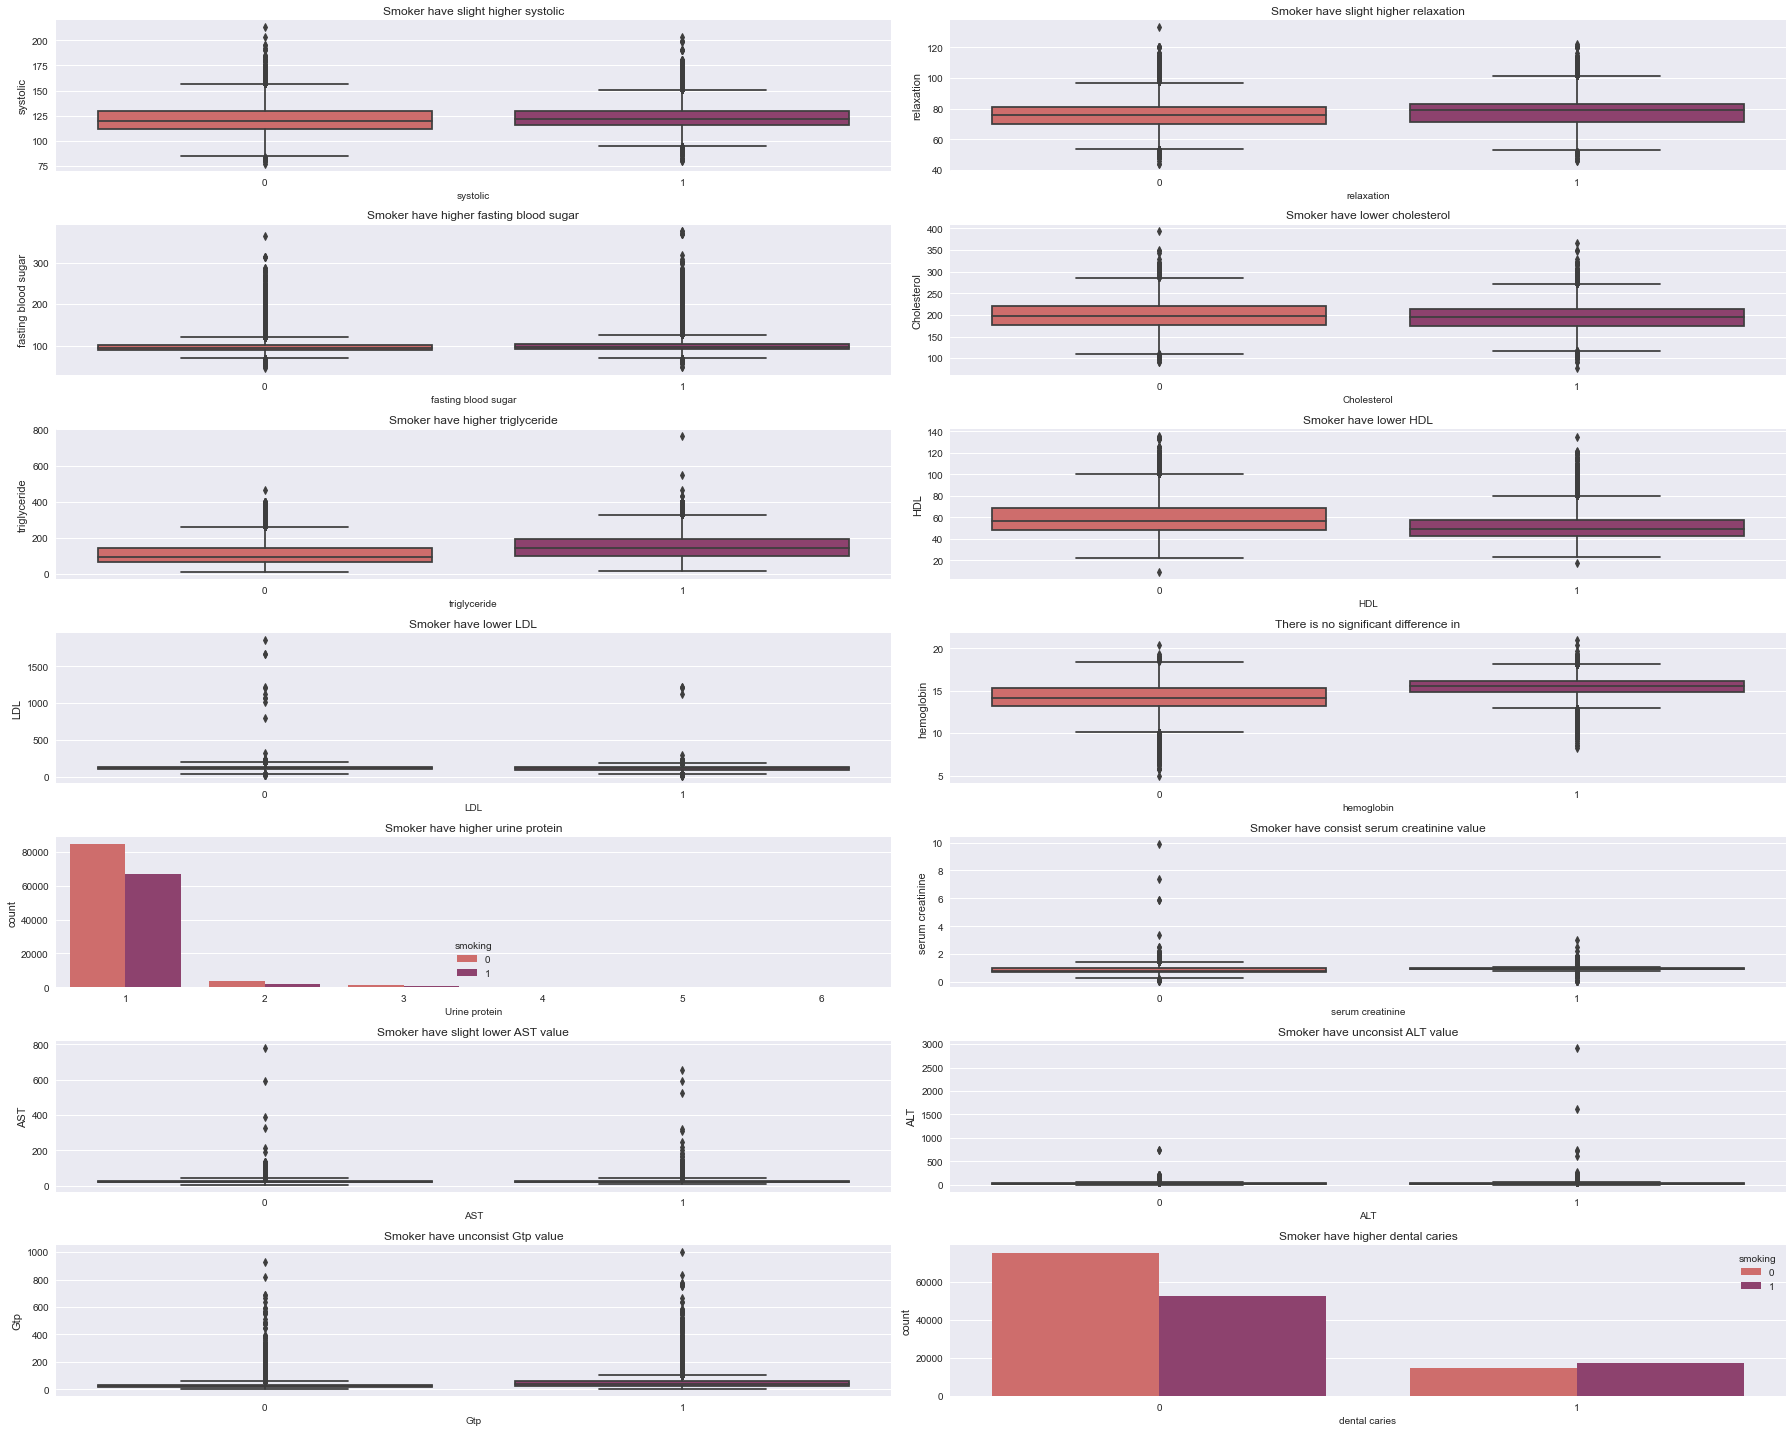

In [17]:
# check the distribution of the target variable
fig, ax=plt.subplots(7,2,figsize=(25,20))
plt.style.use("seaborn")

sns.boxplot(x='smoking',y='systolic',data=data_visualize,ax=ax[0,0],
               palette='flare')
ax[0,0].set_xlabel("systolic",fontsize=10)
ax[0,0].title.set_text("Smoker have slight higher systolic")

sns.boxplot(x='smoking',y='relaxation',data=data_visualize,ax=ax[0,1],
               palette='flare')
ax[0,1].set_xlabel("relaxation",fontsize=10)
ax[0,1].title.set_text("Smoker have slight higher relaxation")

# fasting blood sugar
sns.boxplot(x='smoking',y='fasting blood sugar',data=data_visualize,ax=ax[1,0],
                palette='flare')
ax[1,0].set_xlabel("fasting blood sugar",fontsize=10)
ax[1,0].title.set_text("Smoker have higher fasting blood sugar")

# Cholesterol
sns.boxplot(x='smoking',y='Cholesterol',data=data_visualize,ax=ax[1,1],
                palette='flare')
ax[1,1].set_xlabel("Cholesterol",fontsize=10)
ax[1,1].title.set_text("Smoker have lower cholesterol")

# triglyceride           
sns.boxplot(x='smoking',y='triglyceride',data=data_visualize,ax=ax[2,0],
                palette='flare')
ax[2,0].set_xlabel("triglyceride",fontsize=10)
ax[2,0].title.set_text("Smoker have higher triglyceride")

# HDL                    
sns.boxplot(x='smoking',y='HDL',data=data_visualize,ax=ax[2,1],
                palette='flare')
ax[2,1].set_xlabel("HDL",fontsize=10)
ax[2,1].title.set_text("Smoker have lower HDL")

# LDL
sns.boxplot(x='smoking',y='LDL',data=data_visualize,ax=ax[3,0],
                palette='flare')
ax[3,0].set_xlabel("LDL",fontsize=10)
ax[3,0].title.set_text("Smoker have lower LDL")

# hemoglobin

sns.boxplot(x='smoking',y='hemoglobin',data=data_visualize,ax=ax[3,1],
                palette='flare')
ax[3,1].set_xlabel("hemoglobin",fontsize=10)
ax[3,1].title.set_text("There is no significant difference in")

# Urine protein
sns.countplot(x='Urine protein',hue='smoking',data=data_visualize,ax=ax[4,0],
                palette='flare')
ax[4,0].set_xlabel("Urine protein",fontsize=10)
ax[4,0].title.set_text("Smoker have higher urine protein")

# serum creatinine
sns.boxplot(x='smoking',y='serum creatinine',data=data_visualize,ax=ax[4,1],
                palette='flare')
ax[4,1].set_xlabel("serum creatinine",fontsize=10)
ax[4,1].title.set_text("Smoker have consist serum creatinine value")

# AST
sns.boxplot(x='smoking',y='AST',data=data_visualize,ax=ax[5,0],
                palette='flare')
ax[5,0].set_xlabel("AST",fontsize=10)
ax[5,0].title.set_text("Smoker have slight lower AST value")

# ALT
sns.boxplot(x='smoking',y='ALT',data=data_visualize,ax=ax[5,1],
                palette='flare')
ax[5,1].set_xlabel("ALT",fontsize=10)
ax[5,1].title.set_text("Smoker have unconsist ALT value")

# Gtp
sns.boxplot(x='smoking',y='Gtp',data=data_visualize,ax=ax[6,0],
                palette='flare')
ax[6,0].set_xlabel("Gtp",fontsize=10)
ax[6,0].title.set_text("Smoker have unconsist Gtp value")

# dental caries
sns.countplot(x='dental caries',hue='smoking',data=data_visualize,ax=ax[6,1],
                palette='flare')
ax[6,1].set_xlabel("dental caries",fontsize=10)
ax[6,1].title.set_text("Smoker have higher dental caries")


plt.tight_layout()
plt.show()


At Internal or Diagnostic Metrics, we can see the value of each others is similar between non-smoker and smoker. 
<br> Meanwhile some of data show different value between non-smoker and smoker. <br>
Relaxation, HDL, Hemogloblin, LDL, Urine Protein,  serum creatinine, AST, ALT, GTP, dental caries.<br> However, the different value is not too far away. <br>
There're also the outlier, and it is too far away, we will limit the value of the data

## Check correlation between the data

d:\Python38\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


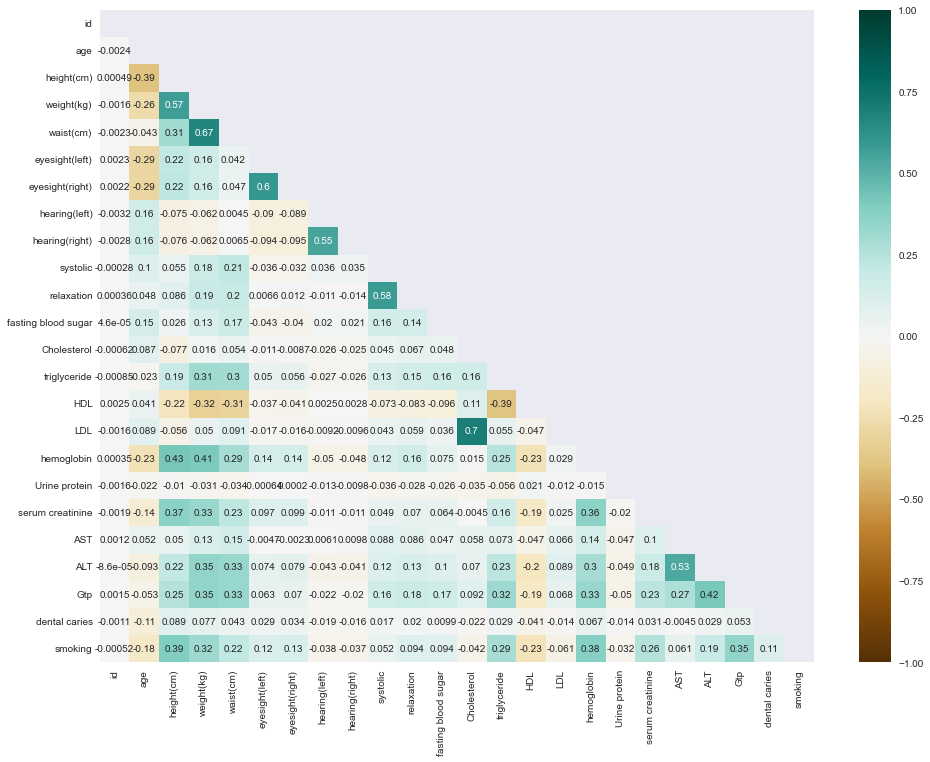

In [18]:
# Why use Kendall : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
corr = data_train.corr('kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [19]:
data_train.corr('kendall')['smoking'].sort_values(ascending=False)[1:]

height(cm)             0.392405
hemoglobin             0.377369
Gtp                    0.348271
weight(kg)             0.315008
triglyceride           0.285617
serum creatinine       0.255352
waist(cm)              0.216883
ALT                    0.187793
eyesight(right)        0.128175
eyesight(left)         0.119138
dental caries          0.106636
relaxation             0.094483
fasting blood sugar    0.093641
AST                    0.060629
systolic               0.052012
id                    -0.000516
Urine protein         -0.031989
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.042206
LDL                   -0.060890
age                   -0.180773
HDL                   -0.225118
Name: smoking, dtype: float64

As we can see here, HDL and Age have -0.1 correlation with smoking. <br>
We still don't know the correlation between the data with the target, so we can't drop the data yet.

# Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Set Y sebagai target featured, X sebagai indikasi 
y = data_train['smoking']
X = data_train.drop(['id','smoking'], axis=1)

X_test = data_test.drop(['id'], axis=1)

X.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0


In [17]:
X_test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1


## Feature Engineering

In [18]:
def feature_engineering(dataframe):

    best = np.where(dataframe['hearing(left)'] < dataframe['hearing(right)'], 
                    dataframe['hearing(left)'],  dataframe['hearing(right)'])
    worst = np.where(dataframe['hearing(left)'] < dataframe['hearing(right)'], 
                     dataframe['hearing(right)'],  dataframe['hearing(left)'])
    dataframe['hearing(left)'] = best - 1
    dataframe['hearing(right)'] = worst - 1
    
    dataframe['eyesight(left)'] = np.where(dataframe['eyesight(left)'] > 9, 0, dataframe['eyesight(left)'])
    dataframe['eyesight(right)'] = np.where(dataframe['eyesight(right)'] > 9, 0, dataframe['eyesight(right)'])
    best = np.where(dataframe['eyesight(left)'] < dataframe['eyesight(right)'], 
                    dataframe['eyesight(left)'],  dataframe['eyesight(right)'])
    worst = np.where(dataframe['eyesight(left)'] < dataframe['eyesight(right)'], 
                     dataframe['eyesight(right)'],  dataframe['eyesight(left)'])
    dataframe['eyesight(left)'] = best
    dataframe['eyesight(right)'] = worst

    # # cap the value
    dataframe['systolic'] = dataframe['systolic'].apply(lambda x: 139 if x > 139 else x)
    dataframe['relaxation'] = dataframe['relaxation'].apply(lambda x: 88 if x > 88 else x)
    dataframe['fasting blood sugar'] = dataframe['fasting blood sugar'].apply(lambda x: 114 if x > 114 else x)
    dataframe['Cholesterol'] = dataframe['Cholesterol'].apply(lambda x: 231 if x > 231 else x)
    dataframe['triglyceride'] = dataframe['triglyceride'].apply(lambda x: 216 if x > 216 else x)
    dataframe['HDL'] = dataframe['HDL'].apply(lambda x: 76 if x > 76 else x)
    dataframe['LDL'] = dataframe['LDL'].apply(lambda x: 148 if x > 148 else x)
    dataframe['hemoglobin'] = dataframe['hemoglobin'].apply(lambda x: 20 if x > 20 else x
                                                              if x < 10 else x)
    dataframe['serum creatinine'] = dataframe['serum creatinine'].apply(lambda x: 3 if x > 3 else x)
    dataframe['AST'] = dataframe['AST'].apply(lambda x: 36 if x > 36 else x)
    dataframe['ALT'] = dataframe['ALT'].apply(lambda x: 46 if x > 46 else x)
    dataframe['Gtp'] = dataframe['Gtp'].apply(lambda x: 66 if x > 66 else x)

    # # BMI = weight(kg) / height(m)^2
    dataframe['BMI'] = dataframe['weight(kg)'] / (dataframe['height(cm)'] / 100) ** 2
    # dataframe.drop(['weight(kg)'], axis=1, inplace=True)

    # # waist / height ratio
    dataframe['waist/height'] = dataframe['waist(cm)'] / dataframe['height(cm)']
    #dataframe.drop(['waist(cm)','height(cm)'], axis=1, inplace=True)

    # # Calculate the sensory average
    dataframe['sensory'] = (dataframe['eyesight(left)'] + dataframe['eyesight(right)']) / 2
    # dataframe.drop(['eyesight(left)', 'eyesight(right)'], axis=1, inplace=True) 
    
    # # # Calculate the hearing average
    dataframe['hearing'] = (dataframe['hearing(left)'] + dataframe['hearing(right)']) / 2
    #dataframe.drop(['hearing(left)', 'hearing(right)'], axis=1, inplace=True) 

    # # colestrol ratio
    dataframe['cholesterol_ratio'] = dataframe['HDL'] / dataframe['LDL']
    # dataframe.drop(['HDL', 'LDL'], axis=1, inplace=True)

    # # # LabelEncoder Urine protein
    # label = LabelEncoder()
    # # dataframe['Urine protein'] = label.fit_transform(dataframe['Urine protein'])

    # # # # LabelEncoder dental caries
    # label = LabelEncoder()
    # # dataframe['dental caries'] = label.fit_transform(dataframe['dental caries'])

    # # Liver Enzymes Score
    dataframe['liver_enzymes_score'] = dataframe['AST'] + dataframe['ALT'] + dataframe['Gtp']
    # dataframe.drop(['AST', 'ALT', 'Gtp'], axis=1, inplace=True)
    
    # # Blood Pressure Score
    dataframe['blood_pressure_score'] = dataframe['systolic'] - dataframe['relaxation']
    # dataframe.drop(['systolic', 'relaxation'], axis=1, inplace=True)

    # # Glucose Cholesterol Score
    dataframe['glucose_cholesterol_score'] = dataframe['fasting blood sugar'] / dataframe['Cholesterol']
    # dataframe.drop(['fasting blood sugar', 'Cholesterol'], axis=1, inplace=True)

    return dataframe

def standardScaler(df_train,df_test,columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    for col in columns:
        df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1,1))
        df_test[col] = scaler.transform(df_test[col].values.reshape(-1,1))
    return df_train,df_test


In [19]:
X = feature_engineering(X)
X_test = feature_engineering(X_test)

X,X_test = standardScaler(X,X_test,X.columns)

X.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI,waist/height,sensory,hearing,cholesterol_ratio,liver_enzymes_score,blood_pressure_score,glucose_cholesterol_score
count,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05,1.592560e+05
mean,2.248666e-17,9.160414e-16,-4.986774e-16,-2.951820e-16,8.628809e-17,7.143084e-17,-5.817977e-17,-3.109762e-17,1.209104e-17,-5.501424e-16,-5.424907e-16,1.677576e-16,6.803999e-17,6.478299e-17,2.714461e-16,1.482513e-15,1.967583e-16,9.256116e-16,-1.070793e-18,-3.390845e-17,3.828086e-17,-7.442013e-17,-3.198103e-16,-1.909581e-16,3.454201e-16,-2.883334e-17,6.024997e-16,-2.352622e-16,-3.380137e-16,1.191258e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.052535e+00,-3.432036e+00,-2.951152e+00,-3.572484e+00,-2.986753e+00,-3.664431e+00,-1.163748e-01,-1.877028e-01,-3.905972e+00,-4.020555e+00,-5.098930e+00,-4.510672e+00,-2.083551e+00,-3.772779e+00,-4.715636e+00,-6.915315e+00,-2.134015e-01,-4.489357e+00,-2.957822e+00,-2.183959e+00,-1.746797e+00,-4.968663e-01,-3.780182e+00,-4.038766e+00,-3.466060e+00,-1.767878e-01,-1.651106e+00,-2.067188e+00,-5.711934e+00,-3.488110e+00
25%,-3.636662e-01,-5.972291e-01,-5.675808e-01,-6.700213e-01,-7.002623e-01,-6.020215e-01,-1.163748e-01,-1.877028e-01,-6.847784e-01,-7.918232e-01,-6.765972e-01,-7.481563e-01,-8.287612e-01,-8.215476e-01,-7.699999e-01,-6.966033e-01,-2.134015e-01,-5.247678e-01,-7.419625e-01,-8.227615e-01,-8.289467e-01,-4.968663e-01,-6.621671e-01,-6.765369e-01,-6.811090e-01,-1.767878e-01,-5.542439e-01,-8.310906e-01,-7.209760e-01,-7.348443e-01
50%,-3.636662e-01,-3.026766e-02,-1.703190e-01,-2.221364e-04,-4.697923e-02,-2.617538e-01,-1.163748e-01,-1.877028e-01,-7.536344e-02,2.016328e-01,-7.355173e-02,5.809699e-02,-1.377176e-01,-8.373966e-02,2.752234e-02,1.418747e-01,-2.134015e-01,4.160217e-02,-1.088598e-01,-2.782824e-01,-3.126560e-01,-4.968663e-01,-6.868401e-02,-4.968058e-02,1.512866e-02,-1.767878e-01,-1.904887e-01,-1.787057e-01,-6.427096e-02,-1.390876e-01
75%,9.029851e-01,5.366938e-01,6.242046e-01,6.695770e-01,9.329454e-01,4.187817e-01,-1.163748e-01,-1.877028e-01,7.081701e-01,6.983608e-01,6.300013e-01,8.643503e-01,7.715502e-01,7.360470e-01,8.250446e-01,7.008600e-01,-2.134015e-01,6.079721e-01,6.825187e-01,6.291827e-01,6.625599e-01,-4.968663e-01,5.065869e-01,6.518483e-01,7.113664e-01,-1.767878e-01,3.398844e-01,7.483677e-01,7.237751e-01,5.918782e-01
max,3.436288e+00,2.804539e+00,4.994084e+00,4.911638e+00,3.546078e+00,3.140924e+00,8.592924e+00,5.327572e+00,1.491704e+00,1.443453e+00,1.735585e+00,1.401853e+00,1.699003e+00,1.719791e+00,1.454667e+00,3.635533e+00,1.416042e+01,1.193537e+01,1.790449e+00,1.899634e+00,1.924604e+00,2.012614e+00,6.332767e+00,5.809289e+00,3.496317e+00,7.283337e+00,1.860220e+02,2.259154e+00,5.189369e+00,1.089944e+01


In [86]:
# # apply pca into X and X_test
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X)
# X_pca = pca.transform(X)
# X_test_pca = pca.transform(X_test)


In [87]:
# # Train test  split
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [20]:
# split by kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits=21, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    

TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    89    142    201 ... 159143 159221 159226]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    24     34     44 ... 159210 159211 159237]
TRAIN: [     1      2      3 ... 159253 159254 159255] TEST: [     0     20     33 ... 159230 159244 159249]
TRAIN: [     0      1      2 ... 159252 159253 159254] TEST: [     4     35     86 ... 159201 159222 159255]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    12     23     39 ... 159179 159224 159233]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    57     62     91 ... 159181 159207 159232]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    31     48     54 ... 159205 159236 159242]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [    22     61    103 ... 159147 159168 159173]
TRAIN: [     0      1      2 ... 159253 159254 159255] TEST: [     3     41     49 ... 159146 159197 159239]
TRAIN: [     0     

In [21]:
# Melihat dimensi data sebelum membuat machine learning
print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(np.shape(X_train),
                                                                      np.shape(y_train),
                                                                      np.shape(X_val),
                                                                      np.shape(y_val)))

Data shapes:

X_train : (151673, 30)
y_train : (151673,)

X_test : (7583, 30)
y_test : (7583,)


In [22]:
print('Data shapes test:\n')
print('X_test :{}'.format(np.shape(X_test)))

Data shapes test:

X_test :(106171, 30)


# Build ML

## Build XGBClassifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [27]:
xgb_params = {
        'n_jobs': -1,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'verbosity': 1,
        'random_state': 42,
    }


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict probabilities
y_proba = xgb.predict_proba(X_val)

# Get ROC AUC score
roc_auc = roc_auc_score(y_val, y_proba[:,1])
print(f'ROC AUC score: {roc_auc:.4f}')


ROC AUC score: 0.8719


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='roc_auc', n_jobs=-1)
print(f'CV AUC scores: {cv_results}')
print(f'Mean ROC AUC score: {cv_results.mean():.4f}')

CV AUC scores: [0.86508486 0.86178812 0.8624394  0.86059864 0.86193794 0.86398676
 0.86326171 0.86629434 0.86381243 0.86542014]
Mean ROC AUC score: 0.8635


[0.02453369 0.514997   0.00772562 0.00719716 0.00797451 0.00752242
 0.00487918 0.00980698 0.01000349 0.00792573 0.00819825 0.01011548
 0.03053904 0.00973258 0.01911529 0.10082357 0.00800769 0.02096189
 0.01195117 0.01495344 0.06610956 0.03820744 0.01290293 0.00758257
 0.00717797 0.         0.00702396 0.0073576  0.00795848 0.00871526]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

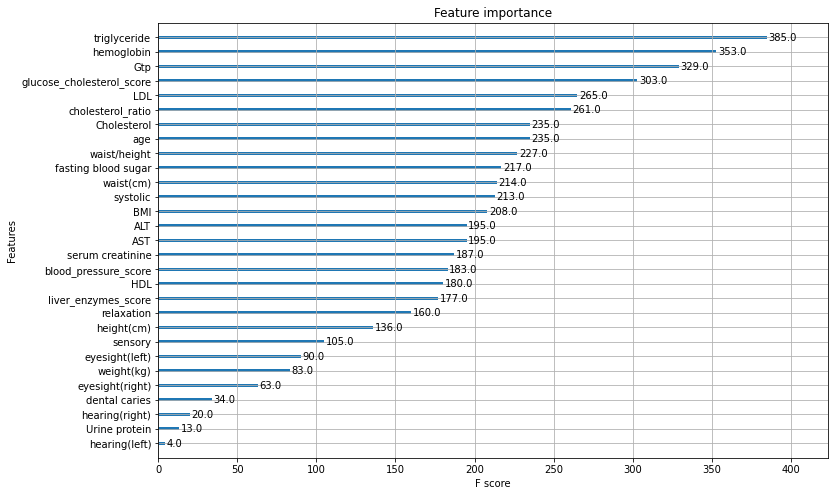

In [28]:
print(xgb.feature_importances_)
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(xgb, ax=ax)


In [29]:
#LGBMClassifier
lgbm_params = {
        'n_jobs': -1,
        'metric': 'logloss',
        'objective': 'binary',
        'verbosity': 1,
        'random_state': 42,
    }

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)

# Predict probabilities
y_proba = lgbm.predict_proba(X_val)

# Get ROC AUC score
roc_auc = roc_auc_score(y_val, y_proba[:,1])
print(f'ROC AUC score: {roc_auc:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 66369, number of negative: 85304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2456
[LightGBM] [Info] Number of data points in the train set: 151673, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437580 -> initscore=-0.250991
[LightGBM] [Info] Start training from score -0.250991
ROC AUC score: 0.8725


In [131]:
# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(lgbm, X_train, y_train, cv=kf, scoring='roc_auc', n_jobs=-1)
print(f'CV AUC scores: {cv_results}')
print(f'Mean ROC AUC score: {cv_results.mean():.4f}')

CV AUC scores: [0.86694668 0.86388741 0.86482084 0.86083615 0.86493518 0.86528526
 0.86481331 0.86681531 0.86435221 0.86502593]
Mean ROC AUC score: 0.8648


In [133]:
# Predict probabilities
y_proba = xgb.predict_proba(X_test)

# insert the prediction into dataframe
# dataframe['id', 'smoking']
dataframe = pd.DataFrame(data_test['id'])
dataframe['smoking'] = y_proba[:,1]
dataframe.to_csv('submission.csv', index=False)
dataframe

,id,smoking
0,159256,0.544508
1,159257,0.178044
2,159258,0.337097
3,159259,0.015277
4,159260,0.671828
...,...,...
106166,265422,0.538723
106167,265423,0.589464
106168,265424,0.552537
106169,265425,0.121840
